In [1]:
#import all packages for assignment

import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn
import os

In [2]:
#changing the working directory to where my file is located
os.chdir('C:/Users/siree/OneDrive/churn.dictionary.files')

In [3]:
#looking up my working directory
cwd = os.getcwd()
print(cwd)

C:\Users\siree\OneDrive\Desktop\WGU\D206\d206-churn.dictionary.files


In [4]:
#reading the CSV file
df = pd.read_csv('churn_raw_data.csv')

In [5]:
#infomation about the data that is in the CSV file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [6]:
#idenitifying the duplicates and the count of it
df.duplicated()
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [7]:
#detecting the missing values
df.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [8]:
#cleaning the missing values
df['Children'].fillna(int(df['Children'].median()), inplace = True)
df['Age'].fillna(int(df['Age'].mean()), inplace = True)
df['Income'].fillna(int(df['Income'].mean()), inplace = True)
df['Techie'].fillna(df['Techie'].mode()[0], inplace = True)
df['Phone'].fillna(df['Phone'].mode()[0], inplace = True)
df['TechSupport'].fillna(df['TechSupport'].mode()[0], inplace = True)
df['Tenure'].fillna(int(df['Tenure'].mean()), inplace = True)
df['Bandwidth_GB_Year'].fillna(int(df['Bandwidth_GB_Year'].mean()), inplace = True)
df.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

In [9]:
#creating zscore for income
df['Z_Score_Children'] = stats.zscore(df['Children'])
df[['Children', 'Z_Score_Children']].head

<bound method NDFrame.head of       Children  Z_Score_Children
0          1.0         -0.427079
1          1.0         -0.427079
2          4.0          1.130655
3          1.0         -0.427079
4          0.0         -0.946323
...        ...               ...
9995       3.0          0.611410
9996       4.0          1.130655
9997       1.0         -0.427079
9998       1.0         -0.427079
9999       1.0         -0.427079

[10000 rows x 2 columns]>

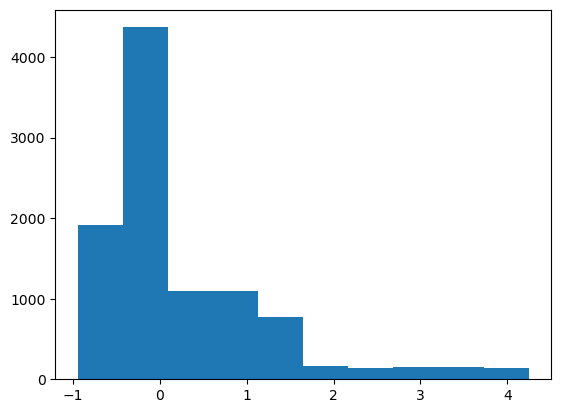

In [10]:
#plotting histogram for Children
plt.hist(df['Z_Score_Children'])
plt.show()

In [11]:
#creating zscore for Age
df['Z_Score_Age'] = stats.zscore(df['Age'])
df[['Age', 'Z_Score_Age']].head

<bound method NDFrame.head of        Age  Z_Score_Age
0     68.0     0.821689
1     27.0    -1.455765
2     50.0    -0.178169
3     48.0    -0.289264
4     83.0     1.654904
...    ...          ...
9995  53.0    -0.011526
9996  48.0    -0.289264
9997  53.0    -0.011526
9998  39.0    -0.789193
9999  28.0    -1.400218

[10000 rows x 2 columns]>

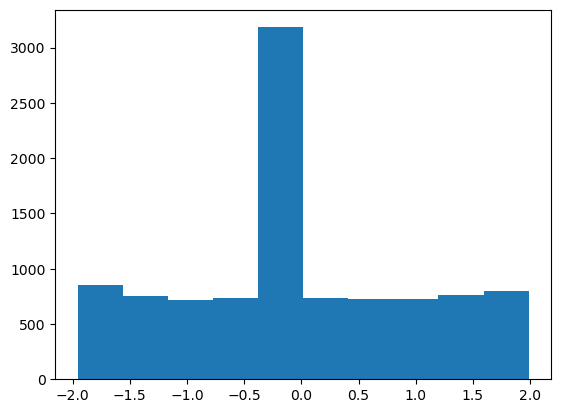

In [12]:
#plotting histogram for Income
plt.hist(df['Z_Score_Age'])
plt.show()

In [13]:
#creating zscore for income
df['Z_Score_Income'] = stats.zscore(df['Income'])
df[['Income', 'Z_Score_Income']].head

<bound method NDFrame.head of         Income  Z_Score_Income
0     28561.99       -0.462873
1     21704.77       -0.741918
2     39936.00       -0.000023
3     18925.23       -0.855027
4     40074.19        0.005600
...        ...             ...
9995  55723.74        0.642437
9996  39936.00       -0.000023
9997  39936.00       -0.000023
9998  16667.58       -0.946899
9999  39936.00       -0.000023

[10000 rows x 2 columns]>

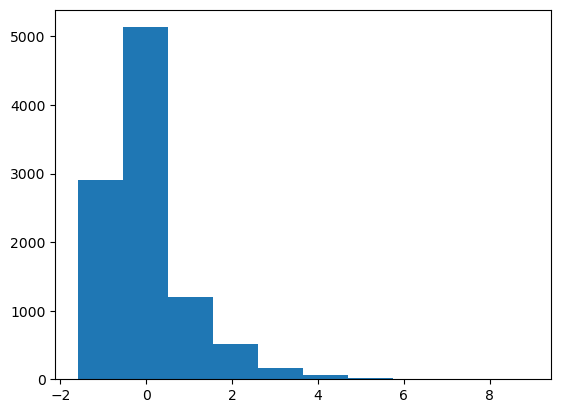

In [14]:
#plotting histogram for Income
plt.hist(df['Z_Score_Income'])
plt.show()

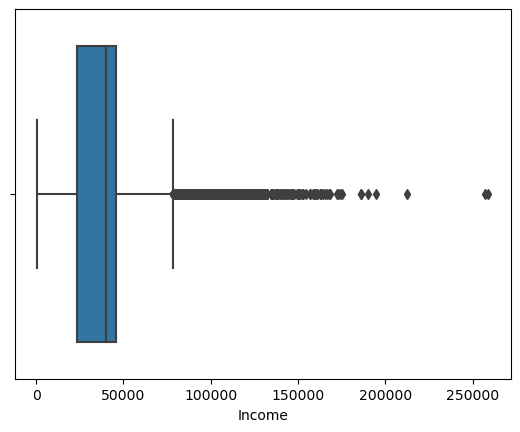

In [15]:
#boxplot of Income
boxplot = seaborn.boxplot(x = 'Income', data = df)

In [16]:
#Income query information
income_query = df.query('Income > 65000' )
income_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 12 to 9987
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1250 non-null   int64  
 1   CaseOrder             1250 non-null   int64  
 2   Customer_id           1250 non-null   object 
 3   Interaction           1250 non-null   object 
 4   City                  1250 non-null   object 
 5   State                 1250 non-null   object 
 6   County                1250 non-null   object 
 7   Zip                   1250 non-null   int64  
 8   Lat                   1250 non-null   float64
 9   Lng                   1250 non-null   float64
 10  Population            1250 non-null   int64  
 11  Area                  1250 non-null   object 
 12  Timezone              1250 non-null   object 
 13  Job                   1250 non-null   object 
 14  Children              1250 non-null   float64
 15  Age                 

In [17]:
df['Income'] = np.where(df['Income'] > 65000, np.nan, df['Income'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

In [18]:
df['Income'].fillna(df['Income'].median(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

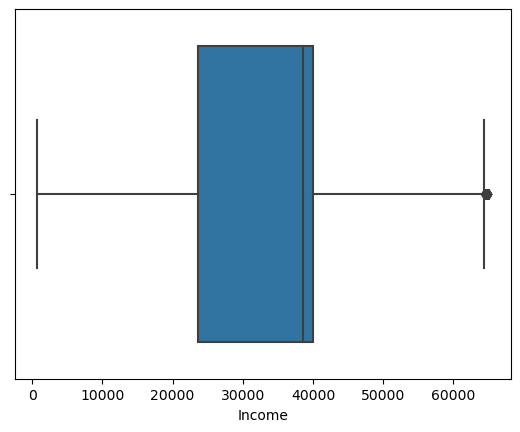

In [19]:
#boxplot of outliers with imputed results
boxplot = seaborn.boxplot(x = 'Income', data = df)

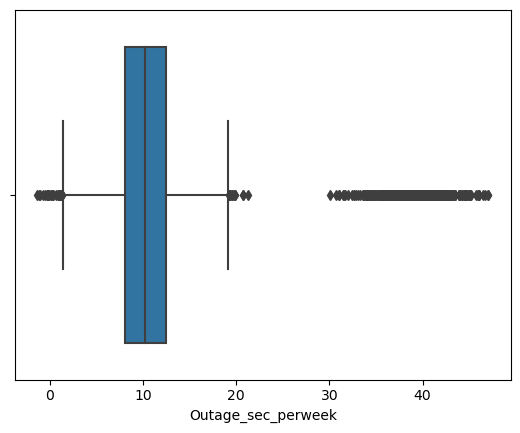

In [20]:
#boxplot for Outage_sec_perweek
boxplot = seaborn.boxplot(x = 'Outage_sec_perweek', data = df)

In [21]:
#Outage_sec_perweek query information
Outage_sec_perweek_query = df.query('Outage_sec_perweek > 17' )
Outage_sec_perweek_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 28 to 9981
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            623 non-null    int64  
 1   CaseOrder             623 non-null    int64  
 2   Customer_id           623 non-null    object 
 3   Interaction           623 non-null    object 
 4   City                  623 non-null    object 
 5   State                 623 non-null    object 
 6   County                623 non-null    object 
 7   Zip                   623 non-null    int64  
 8   Lat                   623 non-null    float64
 9   Lng                   623 non-null    float64
 10  Population            623 non-null    int64  
 11  Area                  623 non-null    object 
 12  Timezone              623 non-null    object 
 13  Job                   623 non-null    object 
 14  Children              623 non-null    float64
 15  Age                  

In [22]:
df['Outage_sec_perweek'] = np.where((df['Outage_sec_perweek'] < 2.5) | (df['Outage_sec_perweek'] > 17), np.nan, df['Outage_sec_perweek'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

In [23]:
df['Outage_sec_perweek'].fillna(df['Outage_sec_perweek'].median(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

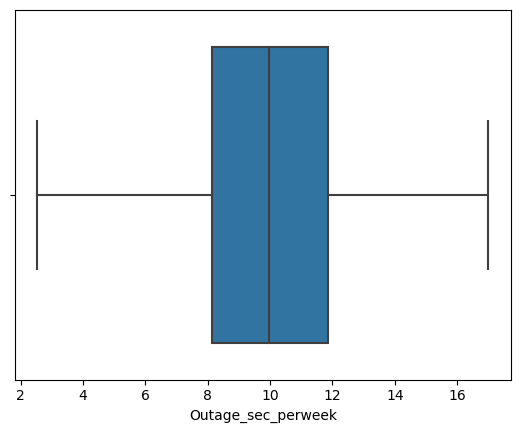

In [24]:
boxplot = seaborn.boxplot(x = 'Outage_sec_perweek', data = df)

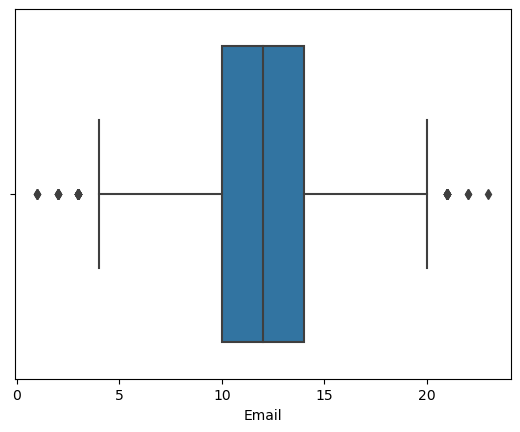

In [25]:
#boxplot for Email
boxplot = seaborn.boxplot(x = 'Email', data = df)

In [26]:
#Email query information
Email_query = df.query('Email > 20' )
Email_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 258 to 9475
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            15 non-null     int64  
 1   CaseOrder             15 non-null     int64  
 2   Customer_id           15 non-null     object 
 3   Interaction           15 non-null     object 
 4   City                  15 non-null     object 
 5   State                 15 non-null     object 
 6   County                15 non-null     object 
 7   Zip                   15 non-null     int64  
 8   Lat                   15 non-null     float64
 9   Lng                   15 non-null     float64
 10  Population            15 non-null     int64  
 11  Area                  15 non-null     object 
 12  Timezone              15 non-null     object 
 13  Job                   15 non-null     object 
 14  Children              15 non-null     float64
 15  Age                  

In [27]:
df['Email'] = np.where((df['Email'] > 20) | (df['Email'] < 4), np.nan, df['Email'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

In [28]:
df['Email'].fillna(df['Email'].median(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

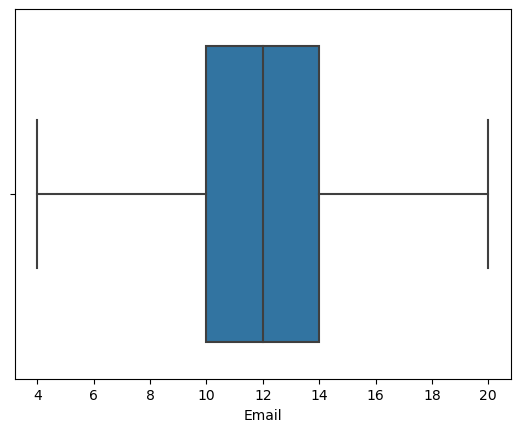

In [29]:
boxplot = seaborn.boxplot(x = 'Email', data = df)

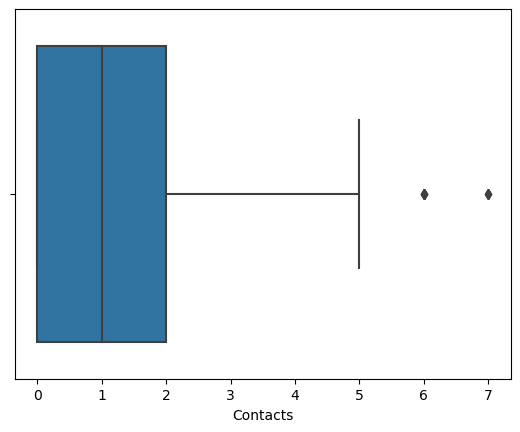

In [30]:
#boxplot for Contacts
boxplot = seaborn.boxplot(x = 'Contacts', data = df)

In [31]:
#Contacts query information
Contacts_query = df.query('Contacts > 5' )
Contacts_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 426 to 9750
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8 non-null      int64  
 1   CaseOrder             8 non-null      int64  
 2   Customer_id           8 non-null      object 
 3   Interaction           8 non-null      object 
 4   City                  8 non-null      object 
 5   State                 8 non-null      object 
 6   County                8 non-null      object 
 7   Zip                   8 non-null      int64  
 8   Lat                   8 non-null      float64
 9   Lng                   8 non-null      float64
 10  Population            8 non-null      int64  
 11  Area                  8 non-null      object 
 12  Timezone              8 non-null      object 
 13  Job                   8 non-null      object 
 14  Children              8 non-null      float64
 15  Age                   

In [32]:
df['Contacts'] = np.where(df['Contacts'] > 5, np.nan, df['Contacts'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

In [33]:
df['Contacts'].fillna(df['Contacts'].median(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

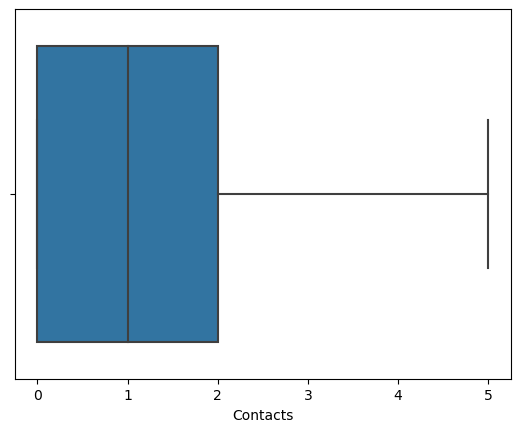

In [34]:
boxplot = seaborn.boxplot(x = 'Contacts', data = df)

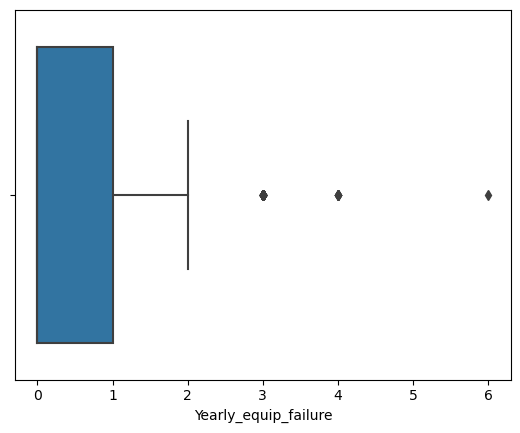

In [35]:
#boxplot for Yearly_equip_failure
boxplot = seaborn.boxplot(x = 'Yearly_equip_failure', data = df)

In [36]:
#Yearly_equip_failure query information
Yearly_equip_failure_query = df.query('Yearly_equip_failure > 2' )
Yearly_equip_failure_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 8 to 9967
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            94 non-null     int64  
 1   CaseOrder             94 non-null     int64  
 2   Customer_id           94 non-null     object 
 3   Interaction           94 non-null     object 
 4   City                  94 non-null     object 
 5   State                 94 non-null     object 
 6   County                94 non-null     object 
 7   Zip                   94 non-null     int64  
 8   Lat                   94 non-null     float64
 9   Lng                   94 non-null     float64
 10  Population            94 non-null     int64  
 11  Area                  94 non-null     object 
 12  Timezone              94 non-null     object 
 13  Job                   94 non-null     object 
 14  Children              94 non-null     float64
 15  Age                   9

In [37]:
df['Yearly_equip_failure'] = np.where(df['Yearly_equip_failure'] > 2, np.nan, df['Yearly_equip_failure'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

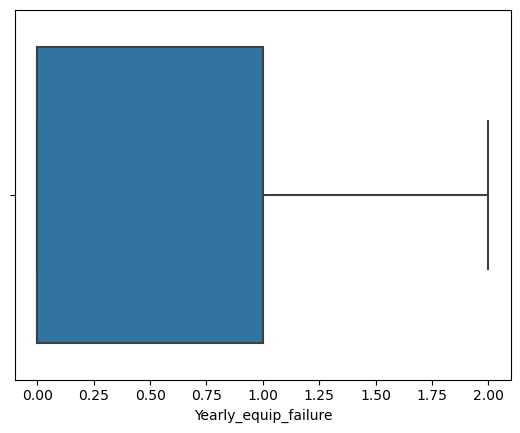

In [38]:
boxplot = seaborn.boxplot(x = 'Yearly_equip_failure', data = df)

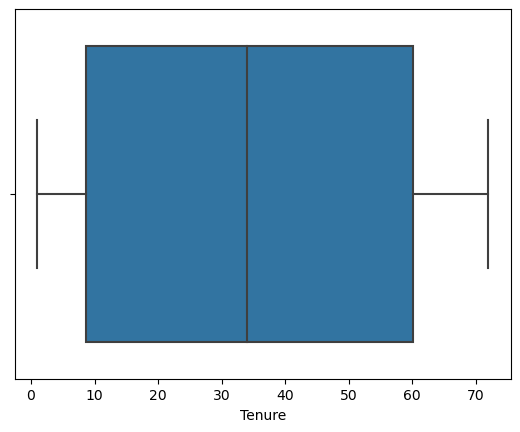

In [39]:
#boxplot outliers for Tenure
boxplot = seaborn.boxplot(x = 'Tenure', data = df)

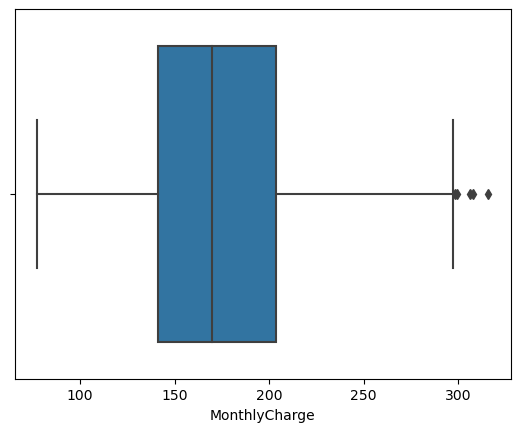

In [40]:
#boxplot for MonthlyCharge
boxplot = seaborn.boxplot(x = 'MonthlyCharge', data = df)

In [41]:
#MonthlyCharge query information
MonthlyCharge_query = df.query('MonthlyCharge > 300' )
MonthlyCharge_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 927 to 4700
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3 non-null      int64  
 1   CaseOrder             3 non-null      int64  
 2   Customer_id           3 non-null      object 
 3   Interaction           3 non-null      object 
 4   City                  3 non-null      object 
 5   State                 3 non-null      object 
 6   County                3 non-null      object 
 7   Zip                   3 non-null      int64  
 8   Lat                   3 non-null      float64
 9   Lng                   3 non-null      float64
 10  Population            3 non-null      int64  
 11  Area                  3 non-null      object 
 12  Timezone              3 non-null      object 
 13  Job                   3 non-null      object 
 14  Children              3 non-null      float64
 15  Age                   

In [42]:
df['MonthlyCharge'] = np.where(df['MonthlyCharge'] > 300, np.nan, df['MonthlyCharge'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

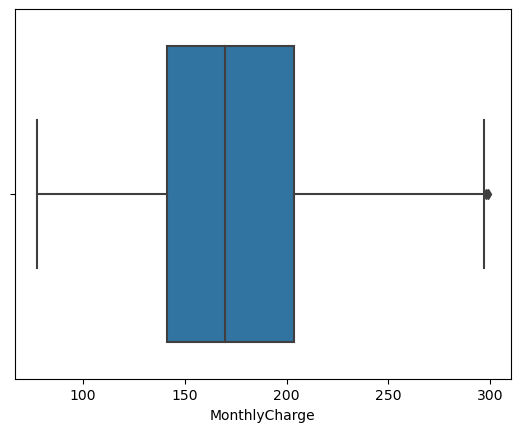

In [43]:
boxplot = seaborn.boxplot(x = 'MonthlyCharge', data = df)

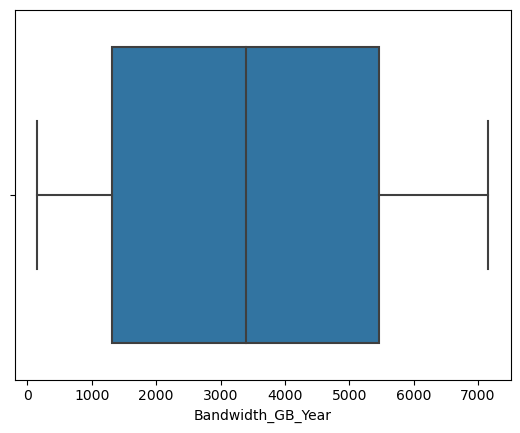

In [44]:
#boxplot outliers for Bandwidth_GB_Year
boxplot = seaborn.boxplot(x = 'Bandwidth_GB_Year', data = df)

In [45]:
#select columns for PCA
PCA1 = df[['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year' ]]

In [46]:
#normalize the data
PCA1_normalized = (PCA1 - PCA1.mean())/PCA1.std()

In [47]:
imputer = SimpleImputer(strategy='mean') 
PCA1_normalized2 = imputer.fit_transform(PCA1_normalized)

In [48]:
#apply PCA
pca = PCA(n_components = PCA1.shape[1])
print(pca)

PCA(n_components=5)


In [49]:
pca.fit(PCA1_normalized2)

PCA(n_components=5)

In [50]:
PCA1_pca = pd.DataFrame(pca.transform(PCA1_normalized2), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [51]:
#PCA LOADINGS
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = PCA1.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
Income,0.004825,0.085733,0.995136,-0.048273,0.000779
Outage_sec_perweek,0.020861,0.701032,-0.094761,-0.706465,-0.006873
Tenure,0.705408,-0.060221,0.000760,-0.032166,-0.705505
MonthlyCharge,0.044938,0.705366,-0.026735,0.705317,-0.047464
Bandwidth_GB_Year,0.707051,-0.006018,-0.003053,0.008437,0.707080


In [52]:
#SELECTING PCs
cov_matrix = np.dot(PCA1_normalized2.T, PCA1_normalized2) / PCA1.shape[0]

In [53]:
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

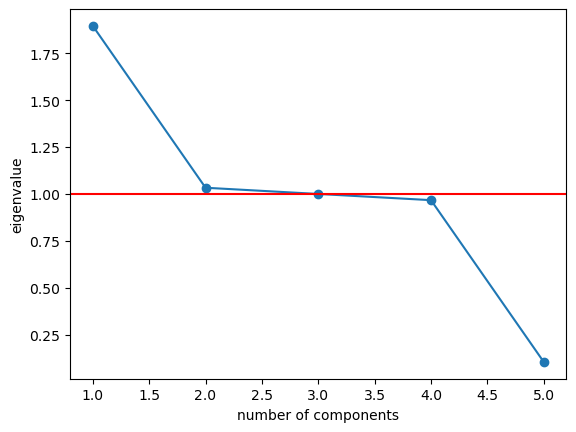

In [54]:
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker = 'o')
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color = "red")
plt.show()

In [55]:
#extract clean data into CSV
df.to_csv('C:/Users/siree/OneDrive/Desktop/WGU/D206/PA_D206_cleaned_data_SireenShaban.csv')